Parte 1.  
Selecionamos el dataset y los modulos el cual van a ser necesario para nuestros EDA
Aqui adjuntamos el Dataset que se trabajará con un problema de accidentes en la ciudad de Madrid del año 2012, el mismo que indica tanto los tipos accidentes que se produjeron como las zonas en las cuales fueron ubicadas .

In [77]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

accidentes= pd.read_excel("./Data/2012_Accidentalidad.xlsx")


Parte 2.  
En nuestro Dataset realizaremos una modificación por un tema de mejor estética visual, la misma que se produjo el cambio de nombre de columnas 

In [78]:
accidentes_nombres = {"Nº VICTIMAS *": "N VICTIMAS", "Tipo Vehiculo": "TIPO VEHICULO", "Tramo Edad": "TRAMO EDAD"}
accidentes.rename(columns=accidentes_nombres, inplace = True)



Parte 3.  
Veremos una breve información general del dataset para deteminar si tenemos datos nulos o missing los mismo que tendremos que tratarlos en el caso de que existan, eso lo detemrinaremos mediante el metodo `info()`

In [79]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26982 entries, 0 to 26981
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA               26982 non-null  datetime64[ns]
 1   RANGO HORARIO       26982 non-null  object        
 2   DIA SEMANA          26982 non-null  object        
 3   DISTRITO            26982 non-null  object        
 4   LUGAR ACCIDENTE     26982 non-null  object        
 5   Nº                  26982 non-null  object        
 6   Nº PARTE            26982 non-null  object        
 7   CPFA Granizo        26982 non-null  object        
 8   CPFA Hielo          26982 non-null  object        
 9   CPFA Lluvia         26982 non-null  object        
 10  CPFA Niebla         26982 non-null  object        
 11  CPFA Seco           26982 non-null  object        
 12  CPFA Nieve          26982 non-null  object        
 13  CPSV Mojada         26982 non-null  object    

Para este dataset se crearan un cierto tipo de funciones que ayudaran a un análisis más descriptivo y visual para la información que vamos a manejar 

In [80]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [81]:
def plot_combined_graphs(Accidentes_New, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if Accidentes_New[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(Accidentes_New[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=Accidentes_New[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [82]:
def pinta_distribucion_categoricas(Accidentes_New, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = Accidentes_New[col].value_counts().sum()
            serie = Accidentes_New[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = Accidentes_New[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

Parte 4.  
Reasignaremos el dataset y lo modificaremos con eliminando dos columnas que sobre entiende la información o que otra columna las sustituye y da una información mucho más resumida y clara, para la eliminación de las mismas procedemos a realizarlo mediante el método `drop()`

In [83]:
Accidentes_New = ["LUGAR ACCIDENTE","Nº"] 
Accidentes_New = accidentes.drop(columns=Accidentes_New)
Accidentes_New.set_index("Nº PARTE", inplace= True)
Accidentes_New


,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,N VICTIMAS,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD
Nº PARTE,,,,,,,,,,,,,,,,,,,,,
2012/98,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,2,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HL,DE 25 A 29 AÑOS
2012/98,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,2,ATROPELLO,NO ASIGNADO,PEATON,MUJER,HL,DE 25 A 29 AÑOS
2012/98,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,2,ATROPELLO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DESCONOCIDA
2012/98,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,2,ATROPELLO,AUTO-TAXI,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS
2012/118,2012-01-01,DE 2:00 A 2:59,DOMINGO,PUENTE DE VALLECAS,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,1,OTRAS CAUSAS,TURISMO,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013/173,2012-12-31,DE 21:00 A 21:59,LUNES,CENTRO,NO,NO,SI,NO,NO,NO,...,NO,NO,NO,1,ATROPELLO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 30 A 34 ANOS
2013/173,2012-12-31,DE 21:00 A 21:59,LUNES,CENTRO,NO,NO,SI,NO,NO,NO,...,NO,NO,NO,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 70 A 74 AÑOS
2013/1,2012-12-31,DE 21:00 A 21:59,LUNES,VILLAVERDE,NO,NO,SI,NO,NO,NO,...,NO,NO,NO,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,MUJER,IL,DE 30 A 34 ANOS


Parte 5.
Visualizamos las columnas 

In [84]:
Accidentes_New.columns

Index(['FECHA', 'RANGO HORARIO', 'DIA SEMANA', 'DISTRITO', 'CPFA Granizo',
       'CPFA Hielo', 'CPFA Lluvia', 'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve',
       'CPSV Mojada', 'CPSV Aceite', 'CPSV Barro', 'CPSV Grava Suelta',
       'CPSV Hielo', 'CPSV Seca Y Limpia', 'N VICTIMAS', 'TIPO ACCIDENTE',
       'TIPO VEHICULO', 'TIPO PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO EDAD'],
      dtype='object')

PArte 6.  
Es momento de asignar variables y lo vamos a determinar mediante la cardinalidad que tengan cada una de las columnas que nos indicará que tan fiable es esa información, cabe recalcar que gran parte de las asignaciones se basa al rol que tenga el investigador y lo que se desee buscar.
Para determinar la cardinalidad se realizará mediante una función.

In [85]:
df_tipificacion = pd.DataFrame([Accidentes_New.nunique(), Accidentes_New.nunique()/len(Accidentes_New) * 100, Accidentes_New.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
FECHA,366,1.35646,datetime64[ns]
RANGO HORARIO,24,0.088948,object
DIA SEMANA,7,0.025943,object
DISTRITO,21,0.07783,object
CPFA Granizo,2,0.007412,object
CPFA Hielo,2,0.007412,object
CPFA Lluvia,2,0.007412,object
CPFA Niebla,2,0.007412,object
CPFA Seco,2,0.007412,object
CPFA Nieve,2,0.007412,object


In [86]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
FECHA,366,1.35646,datetime64[ns],Numerica Discreta
RANGO HORARIO,24,0.088948,object,Numerica Discreta
DIA SEMANA,7,0.025943,object,Categorica
DISTRITO,21,0.07783,object,Numerica Discreta
CPFA Granizo,2,0.007412,object,Binaria
CPFA Hielo,2,0.007412,object,Binaria
CPFA Lluvia,2,0.007412,object,Binaria
CPFA Niebla,2,0.007412,object,Binaria
CPFA Seco,2,0.007412,object,Binaria
CPFA Nieve,2,0.007412,object,Binaria


Parte 7.  
Priorización de variables, mediante este formato se indicarán las variables, una breve descripción, el tipo de variable a considerar y la importancia que le damos a las mismas.
Algo por destacar, es que solo existen variables categóricas, salvo una variable numérica, esto se debe al tipo de investigación, donde se busca algo más cualitativo y descrptivo.

 Nombre del campo                   | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas |
|-----------------------------------|-----------------------------------------------------------------------------|-----------------------|---------------------|-------|
| Fecha                             | Registro del día                                                            | Fecha                 |        2             |       |
| Rango Horario                     | Hora determinada que sucedio el accidente                                   | Categórica            |        2            |       |
| Dia de la semana                  | Dia que se produjo el incidente                                             | Categórica            |        1            |       |
| Distrito                          |Zona del incidente                                                           | Categórica            |        1             |       |
| CPFA                              | Factores Ambientales                                                        | Categórica/Binaria    |        0            |       |
| CPSV                              | Circunstancias que afectan el estado de la via                              | Categórica/Binaria    |        0            |       |
| N victimas                        | El número de los afectados en el incidente                                  | Numérica discreta     |        0             |       |
|Tipo de accidente                  | Descripción de los sucesos                                                  | Categórica            |        1            |       |
| Tipo de persona                   | Afectado-a                                                                  | Categórica            |        2            |       |
| Sexo                              | sexo                                                                        | Binaria               |        0            |       |
| Lesividad                         | Tipo de lesión                                                              | Categórica            |        0             |       |
| Tramo edad                        | Rango de edades del individuo                                               | Categórica            |        1            |       |


Medidas de tendencia central.  
La media y la mediana no indican un analisis claro debido al manejo de información numérica que se esta observando, ya que existen distancias grandes por ejemplo el numero max de esta variable numérica sobrepasa los valores que indican una tendencia general 

La variable numérica observarla 

In [109]:
Accidentes_New["N VICTIMAS"].describe()

count    26982.000000
mean         1.473871
std          0.940920
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: N VICTIMAS, dtype: float64

(2,)


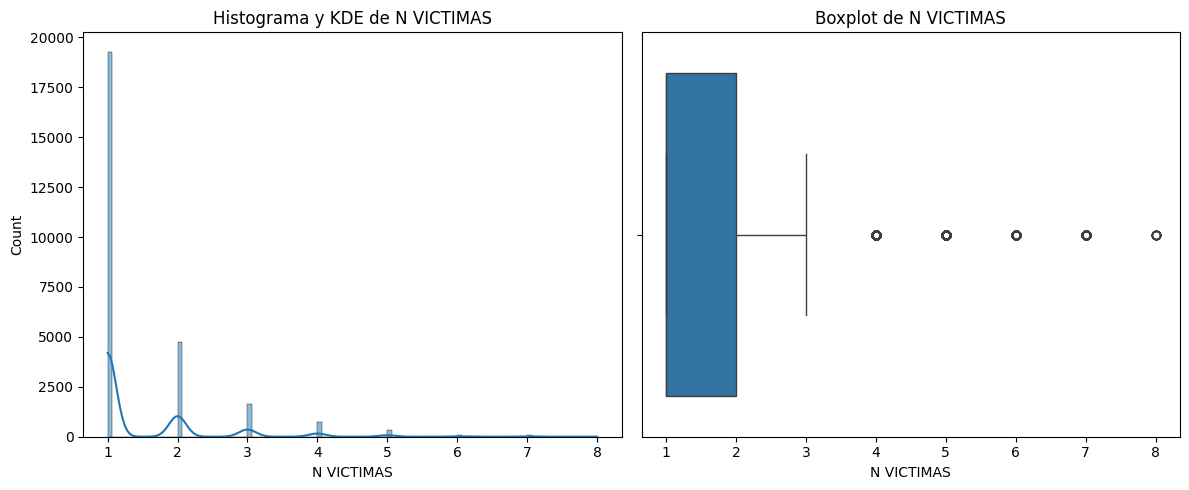

In [89]:
plot_combined_graphs(Accidentes_New,["N VICTIMAS"], whisker_width=1.5)

Categoricas.
Mediante la moda en las variables categóricas se puede ver en un analisis breve como es el patrón más recurrente de los accidentes 

In [153]:
categoricas = ['RANGO HORARIO', 'DIA SEMANA', 'DISTRITO', 'CPFA Granizo',
       'CPFA Hielo', 'CPFA Lluvia', 'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve',
       'CPSV Mojada', 'CPSV Aceite', 'CPSV Barro', 'CPSV Grava Suelta',
       'CPSV Hielo', 'CPSV Seca Y Limpia', 'TIPO ACCIDENTE',
       'TIPO VEHICULO', 'TIPO PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO EDAD']

In [154]:
Accidentes_New[categoricas].mode().T

,0
RANGO HORARIO,DE 19:00 A 19:59
DIA SEMANA,VIERNES
DISTRITO,SALAMANCA
CPFA Granizo,NO
CPFA Hielo,NO
CPFA Lluvia,NO
CPFA Niebla,NO
CPFA Seco,SI
CPFA Nieve,NO
CPSV Mojada,NO


Frecuencioas Relativas para las categoricas 

In [155]:
for catego in categoricas:
    print (f"Para {catego}")
    print(Accidentes_New[catego].value_counts()/len(Accidentes_New)*100)
    print("\n"*2)

Para RANGO HORARIO
RANGO HORARIO
DE 19:00 A 19:59    7.471648
DE 20:00 A 20:59    6.693351
DE 18:00 A 18:59    6.674820
DE 14:00 A 14:59    6.404270
DE 13:00 A 13:59    6.322734
DE 12:00 A 12:59    6.122600
DE 9:00 A 9:59      5.826106
DE 17:00 A 17:59    5.774220
DE 21:00 A 21:59    5.362834
DE 16:00 A 16:59    5.222000
DE 15:00 A 15:59    5.021866
DE 10:00 A 10:59    4.999629
DE 11:00 A 11:59    4.966274
DE 8:00 A 8:59      4.380698
DE 22:00 A 22:59    3.672819
DE 23:00 A 23:59    3.124305
DE 7:00 A 7:59      2.472018
DE 00:00 A 00:59    1.797495
DE 6:00 A 6:59      1.753021
DE 1:00 A 1:59      1.567712
DE 2:00 A 2:59      1.293455
DE 5:00 A 5:59      1.156326
DE 4:00 A 4:59      0.978430
DE 3:00 A 3:59      0.941368
Name: count, dtype: float64



Para DIA SEMANA
DIA SEMANA
VIERNES      16.985398
JUEVES       16.251575
MIERCOLES    14.880291
MARTES       14.861760
LUNES        13.909273
SABADO       12.256319
DOMINGO      10.855385
Name: count, dtype: float64



Para DISTRITO
DISTRIT

Visualización de las Categóricas con F.R

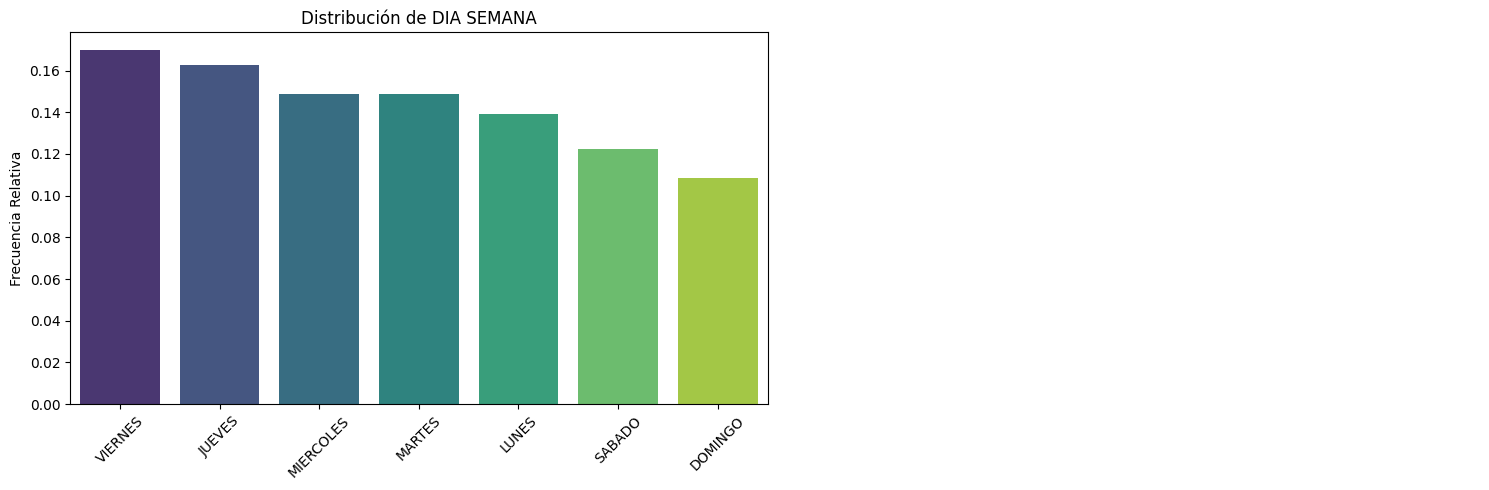

In [156]:
pinta_distribucion_categoricas(Accidentes_New,["DIA SEMANA"],relativa= True)

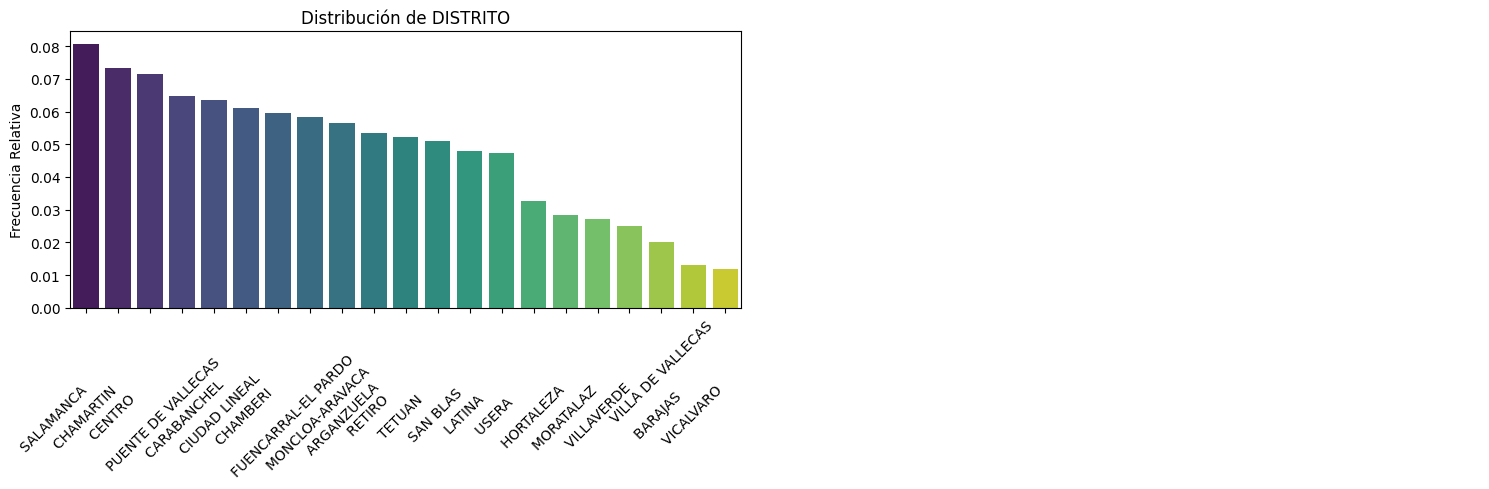

In [157]:
pinta_distribucion_categoricas(Accidentes_New,["DISTRITO"],relativa= True)

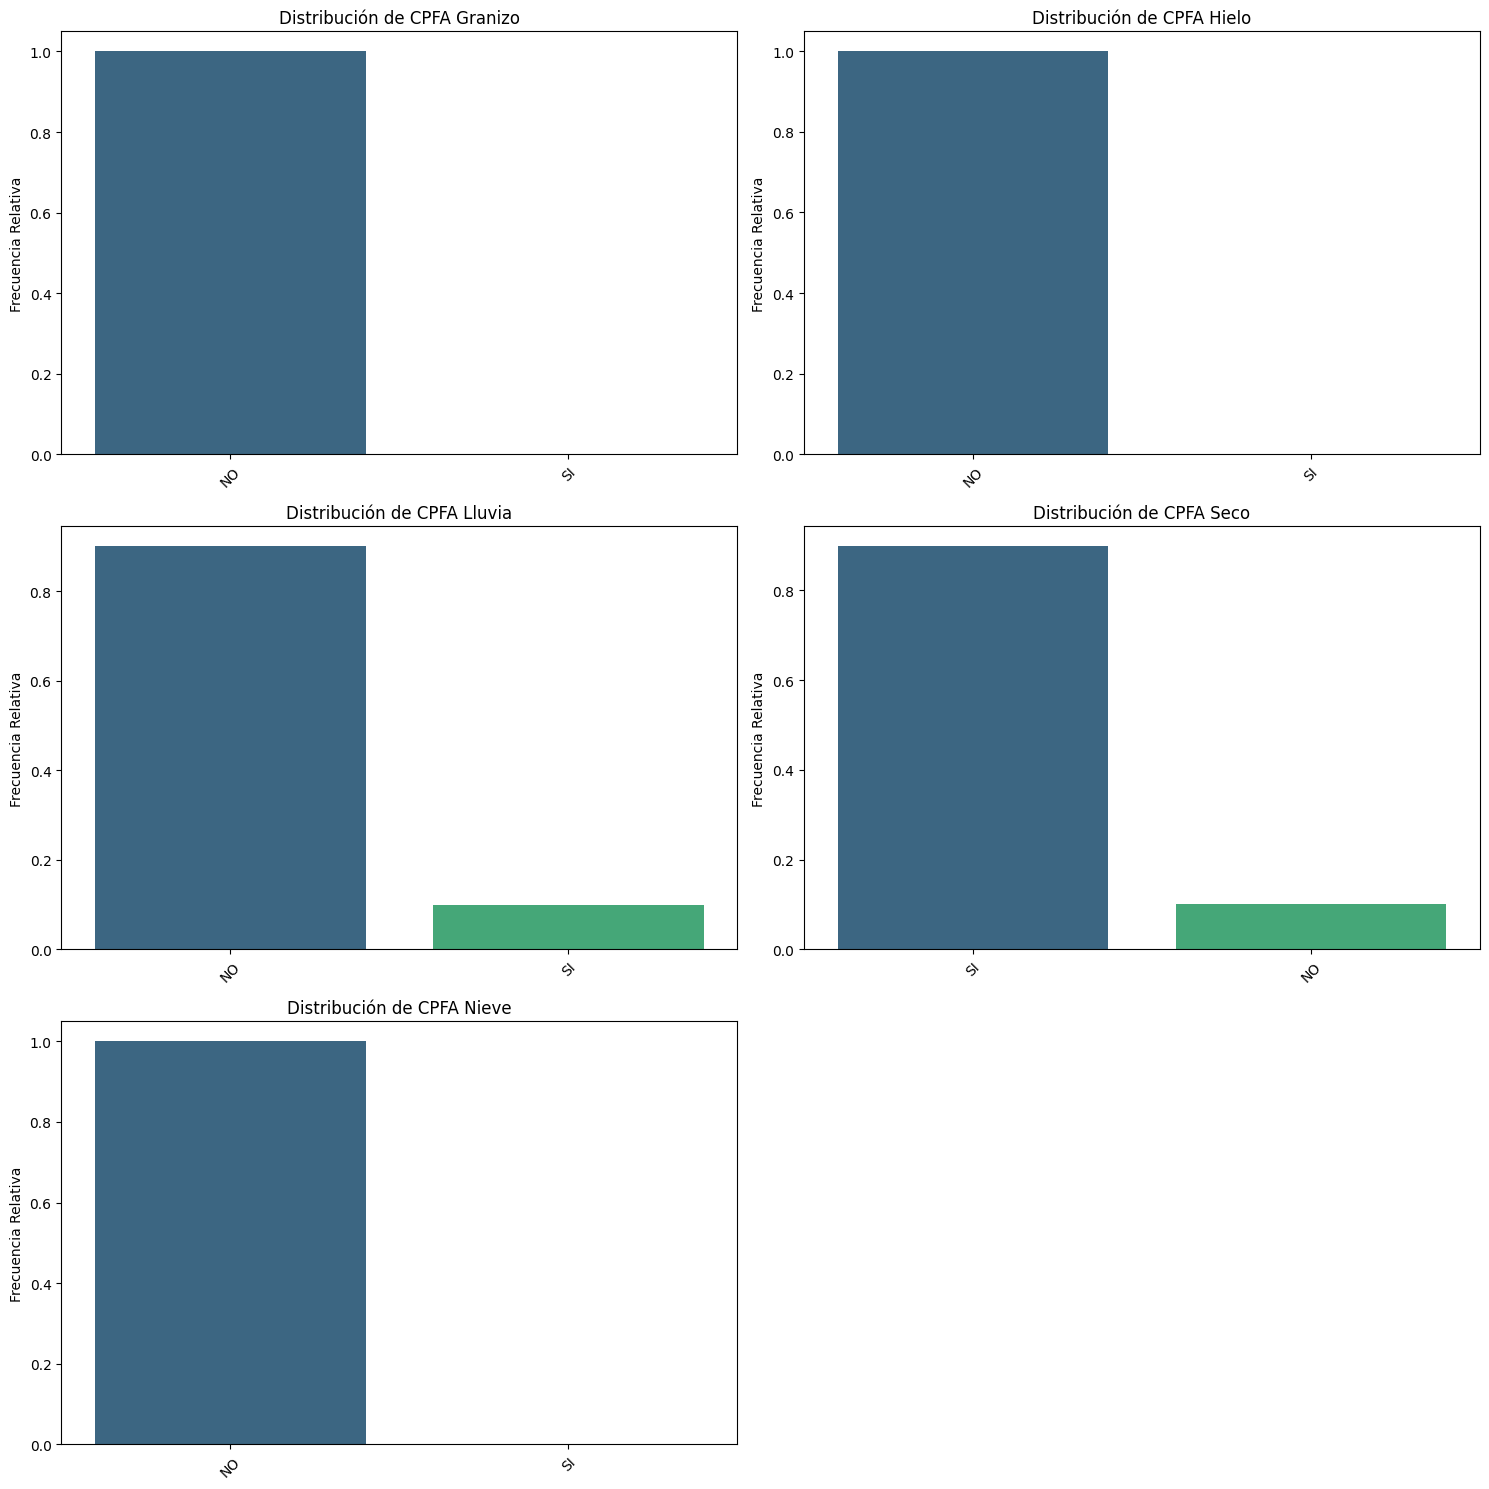

In [158]:
pinta_distribucion_categoricas(Accidentes_New,["CPFA Granizo", "CPFA Hielo", "CPFA Lluvia","CPFA Seco","CPFA Nieve"],relativa= True)

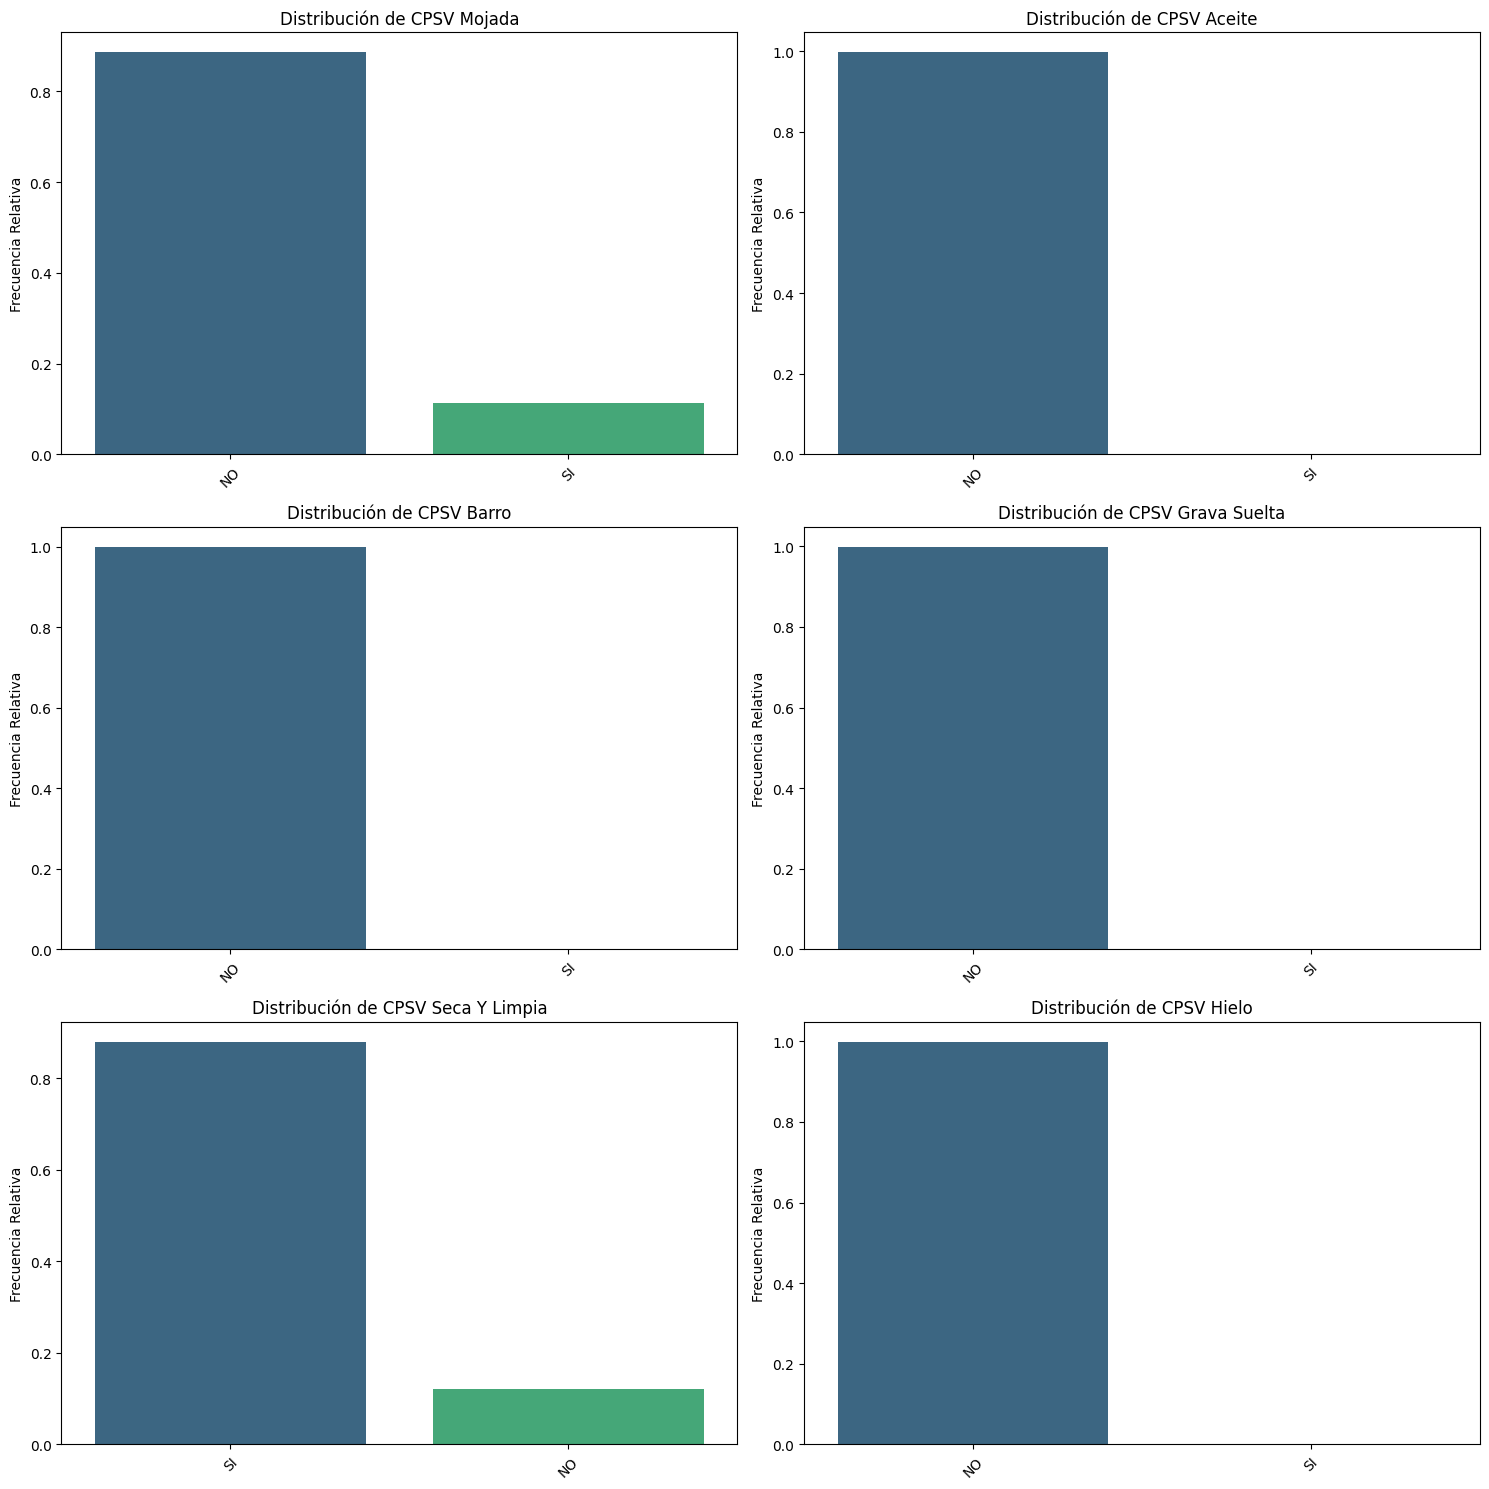

In [159]:
pinta_distribucion_categoricas(Accidentes_New,["CPSV Mojada", "CPSV Aceite", "CPSV Barro","CPSV Grava Suelta","CPSV Seca Y Limpia", "CPSV Hielo"],relativa= True)

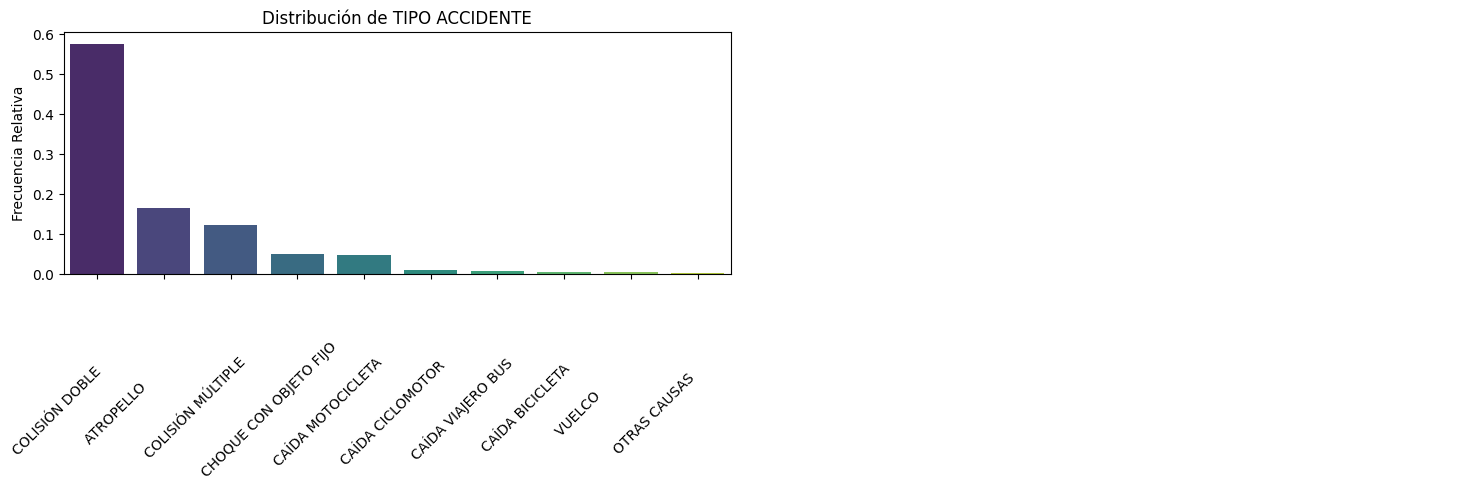

In [160]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO ACCIDENTE"],relativa= True)

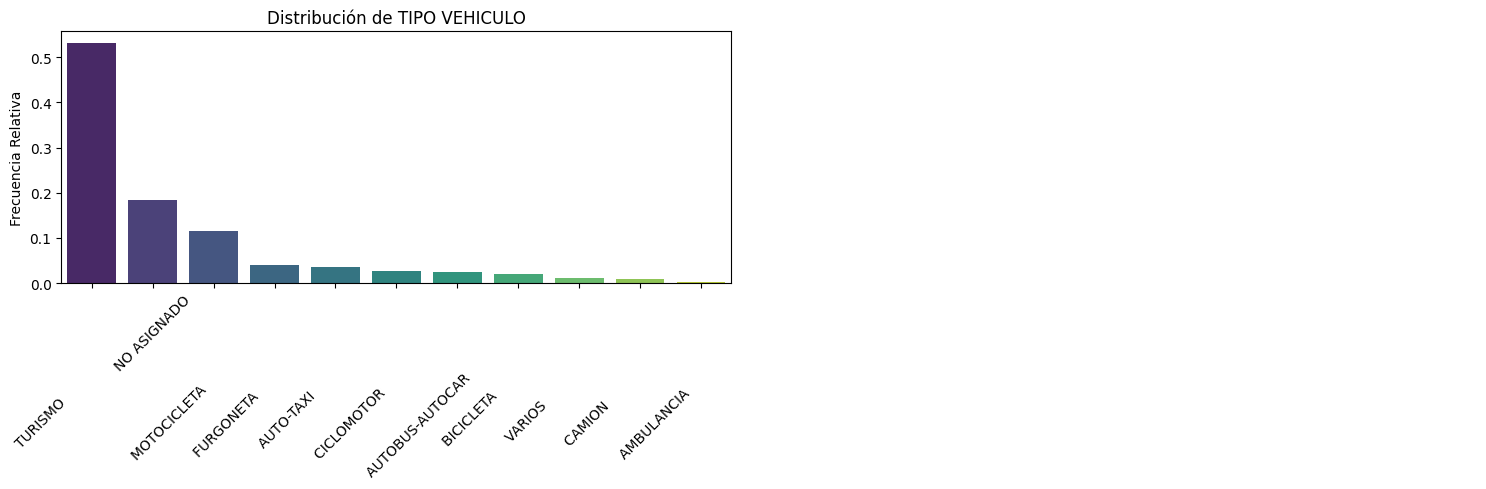

In [161]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO VEHICULO"],relativa= True)

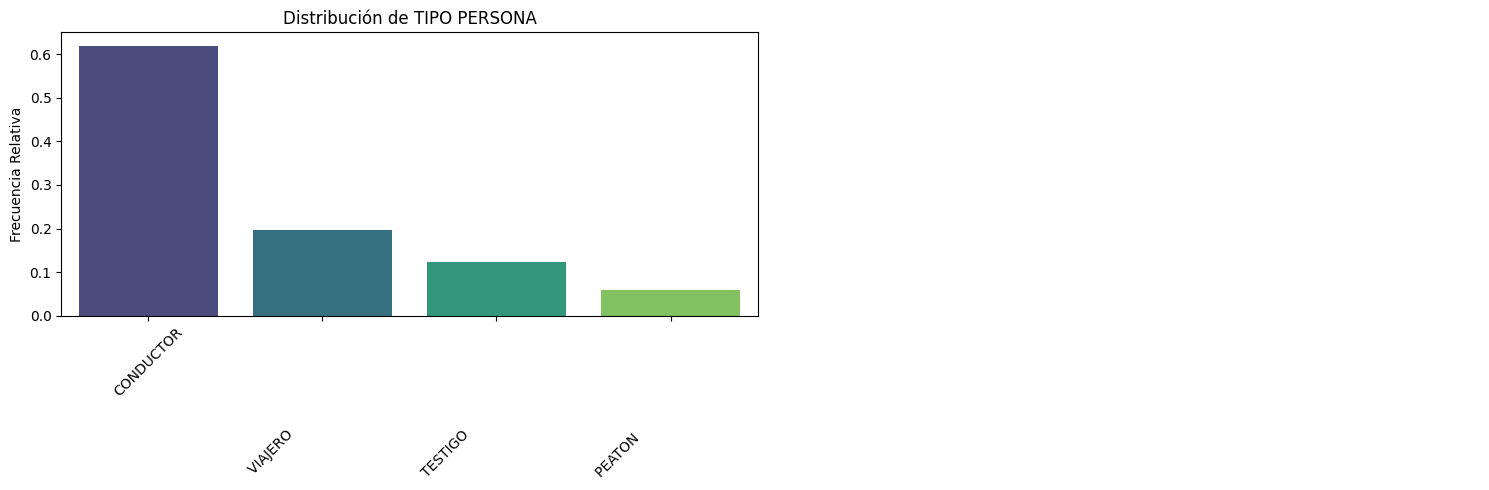

In [162]:
pinta_distribucion_categoricas(Accidentes_New,["TIPO PERSONA"],relativa= True)

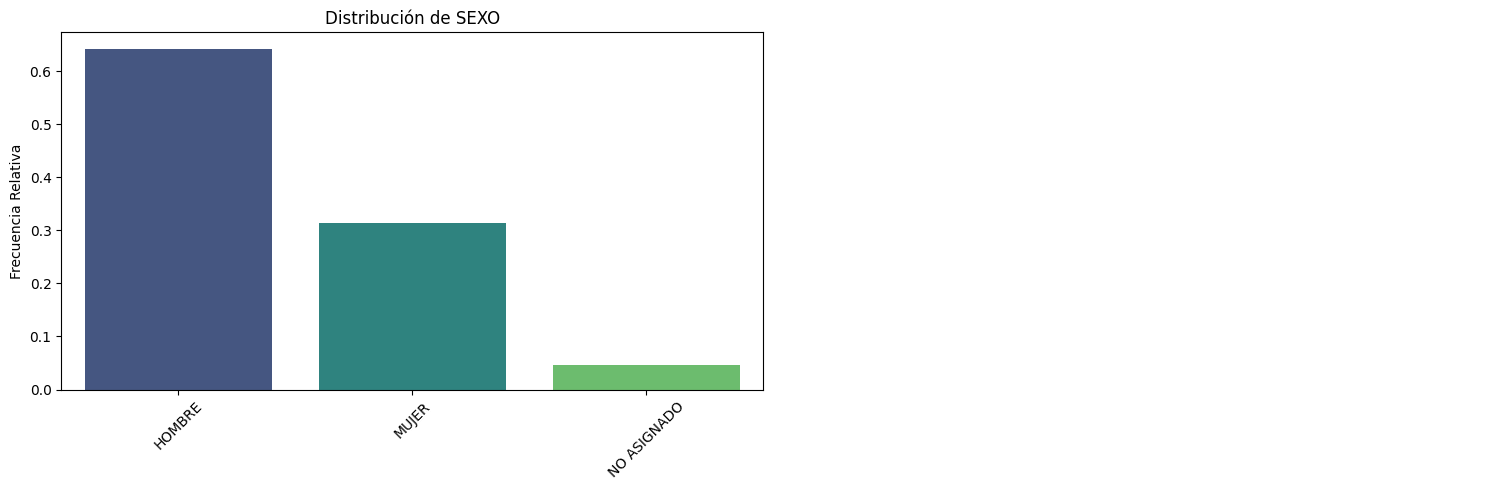

In [163]:
pinta_distribucion_categoricas(Accidentes_New,["SEXO"],relativa= True)

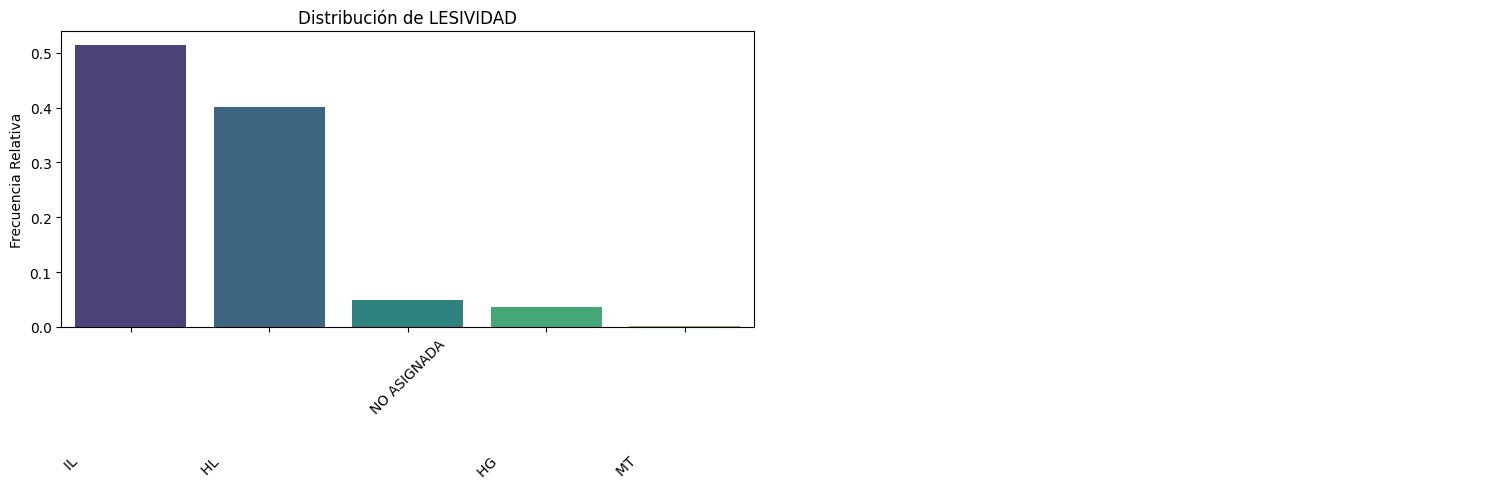

In [164]:
pinta_distribucion_categoricas(Accidentes_New,["LESIVIDAD"],relativa= True)

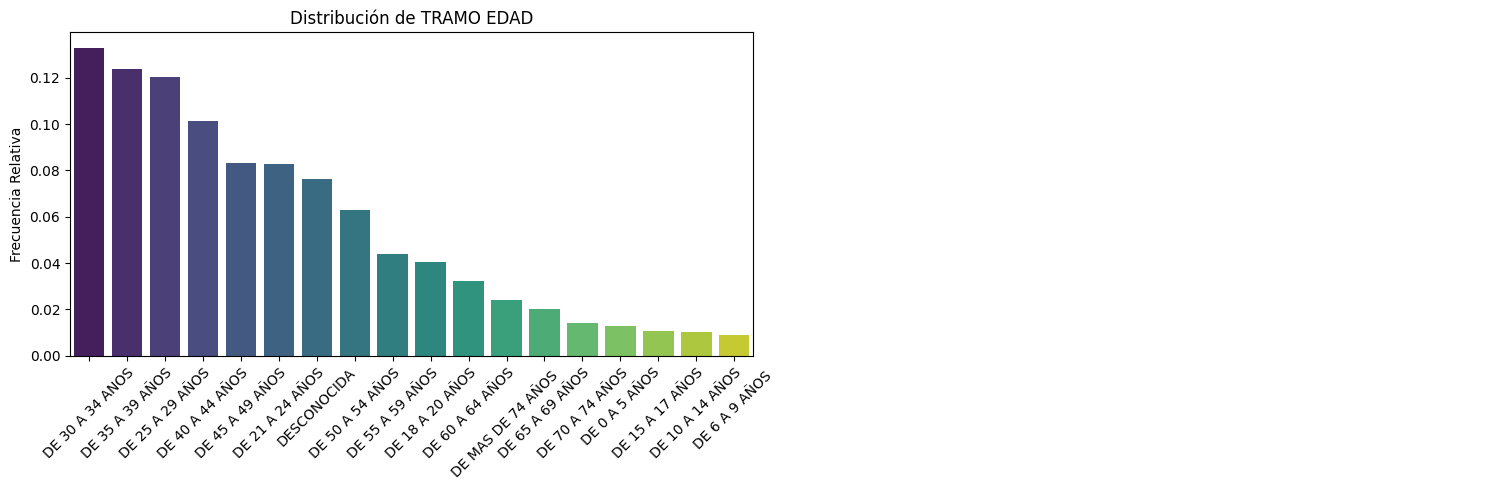

In [165]:
pinta_distribucion_categoricas(Accidentes_New,["TRAMO EDAD"],relativa= True)

Medidas de Posicion